In [5]:
#Importing Libraries
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [7]:
#Importing IPL Dataset
df=pd.read_csv('IPL Dataset.csv')
df.head()



,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,runs_off_bat,extras,wides,noballs,byes,legbyes,wicket_type,player_dismissed,run,over
0,335982,2008,2008-04-18,M.Chinnaswamy Stadium,1,0.1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,BB McCullum,...,0,1,0.0,0.0,0.0,1.0,,,1,0
1,335982,2008,2008-04-18,M.Chinnaswamy Stadium,1,0.2,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,0,0,0.0,0.0,0.0,0.0,,,0,0
2,335982,2008,2008-04-18,M.Chinnaswamy Stadium,1,0.3,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,0,1,1.0,0.0,0.0,0.0,,,1,0
3,335982,2008,2008-04-18,M.Chinnaswamy Stadium,1,0.4,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,0,0,0.0,0.0,0.0,0.0,,,0,0
4,335982,2008,2008-04-18,M.Chinnaswamy Stadium,1,0.5,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,0,0,0.0,0.0,0.0,0.0,,,0,0


In [8]:
#Most IPL Matches played in a Venue
df.groupby(['venue','match_id']).count().droplevel(level=1).index.value_counts()



M.Chinnaswamy Stadium                                   80
Eden Gardens                                            77
Arun Jaitley Stadium                                    74
Wankhede Stadium, Mumbai                                74
Rajiv Gandhi International Stadium, Uppal               64
MA Chidambaram Stadium, Chepauk, Chennai                59
Punjab Cricket Association IS Bindra Stadium, Mohali    56
Sawai Mansingh Stadium                                  47
Dubai International Cricket Stadium                     33
Sheikh Zayed Stadium                                    29
Maharashtra Cricket Association Stadium                 21
Sharjah Cricket Stadium                                 18
Dr DY Patil Sports Academy                              17
Subrata Roy Sahara Stadium                              17
Kingsmead                                               15
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium     13
SuperSport Park                                         

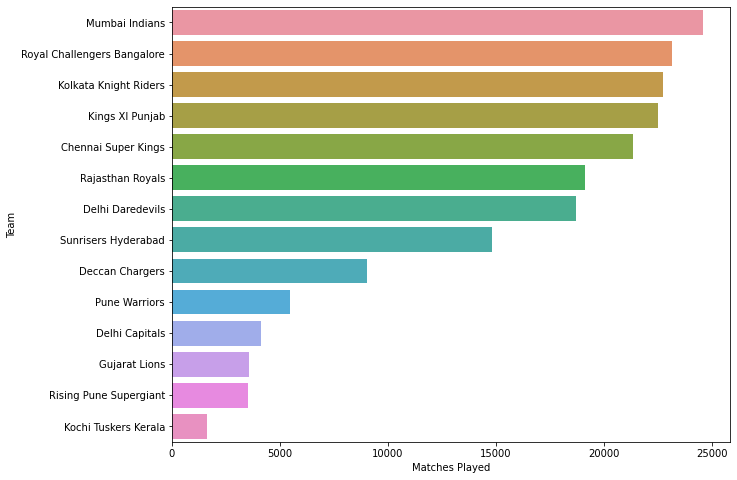

In [8]:
#IPL Matches Played by Each Team
plt.figure(figsize=(10,8))
data = df['bowling_team'].value_counts().sort_values(ascending=False)
sns.barplot(y=data.index,x=data,orient='h')
plt.xlabel('Matches Played')
plt.ylabel('Team')
plt.show()


In [10]:
## IPL Batting Analysis

#Most Run Scored by IPL Teams
df.groupby(['batting_team'])['run'].sum().sort_values(ascending=False)




batting_team
Mumbai Indians                 32488
Royal Challengers Bangalore    30415
Kings XI Punjab                30064
Kolkata Knight Riders          29606
Chennai Super Kings            28560
Rajasthan Royals               24542
Delhi Daredevils               24296
Sunrisers Hyderabad            19539
Deccan Chargers                11463
Pune Warriors                   6358
Delhi Capitals                  5499
Gujarat Lions                   4862
Rising Pune Supergiant          4533
Kochi Tuskers Kerala            1901
Name: run, dtype: int64

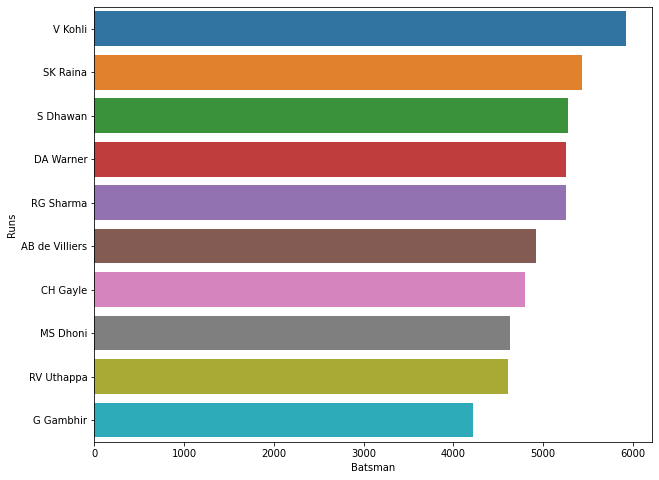

In [18]:
#Most IPL Runs by a Batsman

plt.figure(figsize=(10,8))
data = df.groupby(['striker'])['runs_off_bat'].sum().sort_values(ascending=False)[:10]
sns.barplot(y=data.index,x=data,orient='h')
plt.xlabel('Batsman')
plt.ylabel('Runs')
plt.show()


In [20]:
# Most IPL Century by a Player
runs = df.groupby(['striker','match_id'])['runs_off_bat'].sum()
runs[runs >= 100].droplevel(level=1).groupby('striker').count().sort_values(ascending=False)[:10]


striker
CH Gayle          6
V Kohli           5
DA Warner         4
SR Watson         4
AB de Villiers    3
HM Amla           2
M Vijay           2
KL Rahul          2
SV Samson         2
S Dhawan          2
Name: runs_off_bat, dtype: int64

In [24]:
#Highest Total by IPL Teams
df.groupby(['start_date','batting_team']).sum()['run'].droplevel(level=0).sort_values(ascending=False)[:10]


batting_team
Royal Challengers Bangalore    263
Royal Challengers Bangalore    248
Chennai Super Kings            246
Kolkata Knight Riders          245
Chennai Super Kings            240
Royal Challengers Bangalore    235
Kolkata Knight Riders          232
Kings XI Punjab                232
Delhi Daredevils               231
Sunrisers Hyderabad            231
Name: run, dtype: int64

In [13]:
##Bowling Analysis

#Most IPL Wickets by a Bowler
lst = 'caught,bowled,lbw,stumped,caught and bowled,hit wicket'
df[df['wicket_type'].apply(lambda x: True if x in lst and x != ' ' else False)]['bowler'].value_counts()[:10]


SL Malinga         170
A Mishra           160
PP Chawla          156
DJ Bravo           154
Harbhajan Singh    150
R Ashwin           139
B Kumar            137
SP Narine          127
YS Chahal          121
UT Yadav           119
Name: bowler, dtype: int64

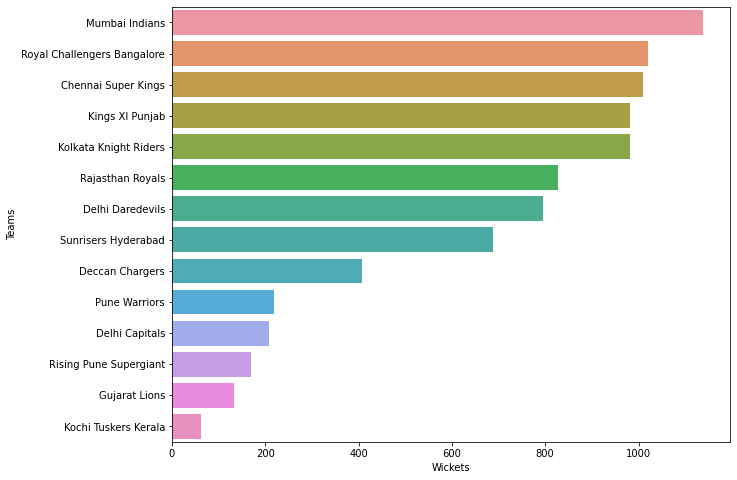

In [14]:
#Most Wickets by an IPL Team
plt.figure(figsize=(10,8))
lst = 'caught,bowled,lbw,stumped,caught and bowled,hit wicket'
data = df[df['wicket_type'].apply(lambda x: True if x in lst and x != ' ' else False)]['bowling_team'].value_counts()
df.groupby(['batting_team'])['extras'].agg('sum').sort_values(ascending=False)
sns.barplot(y=data.index,x=data,orient='h')
plt.xlabel('Wickets')
plt.ylabel('Teams')
plt.show()


In [15]:
#Most Maiden over by a Bowler
data = df.groupby(['start_date','bowler','over'])['run'].sum()
data = data[data.values == 0].droplevel(level=[0,2])
data.index.value_counts()[:10]


P Kumar           12
IK Pathan          9
SL Malinga         8
DW Steyn           8
B Kumar            7
DS Kulkarni        7
Sandeep Sharma     6
DJ Bravo           6
R Ashwin           5
Z Khan             5
Name: bowler, dtype: int64

In [16]:
#Most No Balls by an IPL team
df.groupby(['batting_team'])['noballs'].agg('sum').sort_values(ascending=False)


batting_team
Royal Challengers Bangalore    106.0
Chennai Super Kings             96.0
Mumbai Indians                  96.0
Rajasthan Royals                94.0
Kolkata Knight Riders           90.0
Delhi Daredevils                73.0
Kings XI Punjab                 71.0
Sunrisers Hyderabad             53.0
Deccan Chargers                 49.0
Pune Warriors                   24.0
Delhi Capitals                  21.0
Gujarat Lions                   17.0
Kochi Tuskers Kerala            11.0
Rising Pune Supergiant           8.0
Name: noballs, dtype: float64